In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')


<ipython-input-47-39a339291db2>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
data=pd.read_csv("INR=X.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-10,82.615303,82.715302,82.550499,82.615303,82.615303,0.0
1,2023-07-11,82.525299,82.633301,81.266899,82.525299,82.525299,0.0
2,2023-07-12,82.399902,82.463997,81.972198,82.399902,82.399902,0.0
3,2023-07-13,82.001801,82.141296,81.953499,82.001801,82.001801,0.0
4,2023-07-14,82.030800,82.192596,81.928001,82.030800,82.030800,0.0


In [ ]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
data=data.dropna()

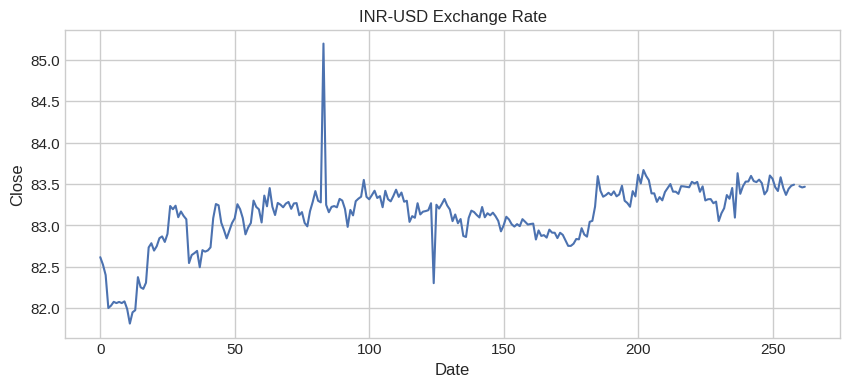

In [ ]:
plt.figure(figsize=(10,4))
plt.title("INR-USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data['Close'])
plt.show()

In [ ]:
data.drop('Date', axis=1).corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.835813,0.779538,1.000000,1.000000,NaN
High,0.835813,1.000000,0.733346,0.835813,0.835813,NaN
Low,0.779538,0.733346,1.000000,0.779534,0.779534,NaN
Close,1.000000,0.835813,0.779534,1.000000,1.000000,NaN
Adj Close,1.000000,0.835813,0.779534,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


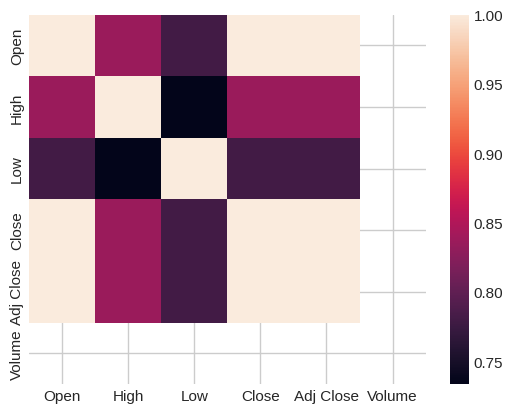

In [ ]:
sns.heatmap(data.drop('Date', axis=1).corr())
plt.show()

In [ ]:
x=data[['Open','High','Low']]
y=data['Close']


In [ ]:
x=x.to_numpy()
y=y.to_numpy()

In [ ]:
y=y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [ ]:
data=pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
data.head()

,Predicted Rate
0,83.417397
1,83.385300
2,83.473099
3,82.910400
4,83.267097


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(ytest,ypred)
print("R2 Score: ", r2*100)

R2 Score:  99.71822027591693


In [ ]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']

In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from datetime import datetime, timedelta
import joblib
import yfinance as yf

In [ ]:
st.title("INR-USD Exchange Rate Predictor")
date_input=st.date_input("Today's date: ", datetime.today())
start1=date_input-timedelta(days=10)
end1=date_input+timedelta(days=5)
df=yf.download('INR=X', start=start1, end=end1)

if st.button('Predict Next 5 Days'):
    if df.empty:
        st.error("No data available for this given date.")
    else:
        l=df.tail(5)
        features=l[['Open','High','Low']].values
        predictions=[]
        for i in range(5):
            prediction=model.predict(features)[0]
            predictions.append(prediction)
            if i <4:

              features[i+1]=np.array([[prediction, prediction, prediction]])
        st.write("Predicted Exchange Rates for the next 5 days: ")
        for i, pred in enumerate(predictions,1):
            st.write(f"Day {i}: {pred:.4f}")

[*********************100%%**********************]  1 of 1 completed
